### Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-
-

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат


# Допоміжне

In [12]:
import matplotlib.pyplot as plt
import time
import random
from tqdm import tqdm

In [10]:
with open("/home/oleh/programming/Coding-Algorithms/eneida.txt",'r',encoding='utf-8') as f:
    eneida=f.read()
SYMBOLS="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 "

In [13]:
def random_generated_sequence(symbols, length):
    return ''.join(random.choice(symbols) for _ in range(length))
random_generated_sequence(SYMBOLS, 10)

'h GVDeeRGY'

In [8]:
def test_multiple(functions,VALS,ITERATIONS,symbols,names):
    time_list=[[0] for _ in range(len(functions))]
    for value in tqdm(VALS):
        tmp_time=[0 for _ in range(len(functions))]
        for _ in range(ITERATIONS):
            tmp_graph=random_generated_sequence(symbols,value)
            for func in functions:
                start=time.time()
                func(tmp_graph)
                tmp_time[functions.index(func)]+=time.time()-start
        for i, val in enumerate(tmp_time):
            time_list[i].append(val/ITERATIONS)
            
    lines=[]
    VALS=[0]+VALS
    plt.xlabel('Values')
    plt.ylabel('Runtime')
    print(time_list[0])
    print(VALS)
    for i in range(len(functions)):
        plt.plot(VALS,time_list[i],label=names[i])
    plt.legend()
    plt.xticks(VALS)
    plt.show()

# Алгоритм Гаффмана

In [2]:
"""
Huffman coding algorithm
"""
from heapq import heappush, heappop
class Node:
    """
    Node class
    """
    def __init__(self, freq, char, left=None, right=None):
        self.char=char
        self.freq=freq
        self.left=left
        self.right=right
        self.direction=""
    def __lt__(self, other):
        return self.freq<other.freq
class Huffman:
    """
    Huffman coding algorithm
    """
    def __init__(self):
        pass
    def encode(self, data):
        """
        Huffman encode
        """
        frequencies=self.frequency(data)
        nodes=[]
        for k,v in frequencies.items():
            heappush(nodes,Node(v,k))
        while len(nodes)!=1:
            nodes.sort(key=lambda x:x.freq)
            left=heappop(nodes)
            right=heappop(nodes)
            left.direction="0"
            right.direction="1"
            heappush(nodes,Node(left.freq+right.freq, left.char+right.char, left, right))
        codes=dict(sorted(self.build_tree(nodes[0]).items(), key=lambda x:x[1],reverse=True))
        encoded_data=''.join(list(map(lambda x:codes[x], data)))
        return encoded_data,codes
    def build_tree(self, node, code=""):
        """
        Build huffman tree
        """
        codes={}
        code+=node.direction
        if node.left:
            left=self.build_tree(node.left, code)
            codes.update(left)
        if node.right:
            right=self.build_tree(node.right, code)
            codes.update(right)
        if not node.left and not node.right:
            codes[node.char]=code
        return codes

    def frequency(self, data):
        """
        Find each char's frequency
        """
        freq={}
        for i in set(data):
            freq[i]=data.count(i)
        return freq
    def decode(self, data, dictionary):
        """
        Huffman decode
        """
        decoded_data=""
        tmp=""
        for char in data:
            tmp+=char
            if tmp in dictionary.values():
                decoded_data+=list(dictionary.keys())[list(dictionary.values()).index(tmp)]
                tmp=""
        return decoded_data
    @staticmethod
    def calculate_compression(compressed_data, original_data):
        """
        Calculate compression ratio
        """
        return (8*len(original_data))/len(compressed_data)*100

In [3]:
g=Huffman()
data="daaaab"
print(g.encode(data))
print(g.decode(*g.encode(data)))
print(Huffman.calculate_compression(g.encode(data)[0], data))
print(g.encode(data)[0],data)
encoded=g.encode(eneida)
print(Huffman.calculate_compression(encoded[0], eneida))
print(g.decode(*encoded)==eneida)

('01111100', {'a': '1', 'd': '01', 'b': '00'})
daaaab
600.0
01111100 daaaab
158.59497491671505
True


100%|██████████| 5/5 [00:00<00:00, 17.10it/s]

[0, 2.6178359985351562e-05, 0.00016055107116699218, 0.00033338069915771483, 0.0009251832962036133, 0.008001279830932618]
[0, 10, 100, 1000, 10000, 100000]


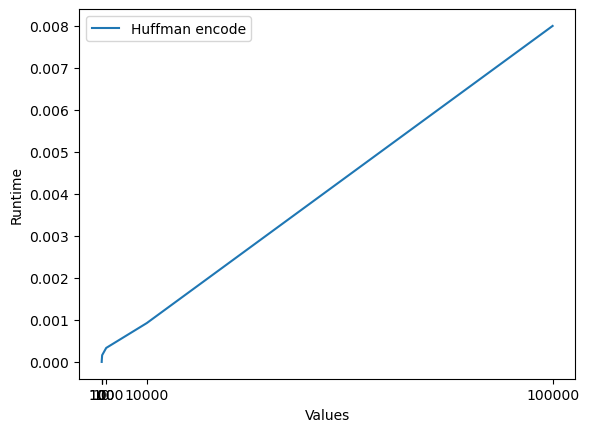

In [20]:
test_multiple([g.encode], [10,100,1000,10000,100000], 10, SYMBOLS, ["Huffman encode"])

100%|██████████| 3/3 [00:41<00:00, 13.80s/it]

[0, 0.07710559368133545, 0.3861961841583252, 0.7986754417419434]
[0, 1000000, 5000000, 10000000]


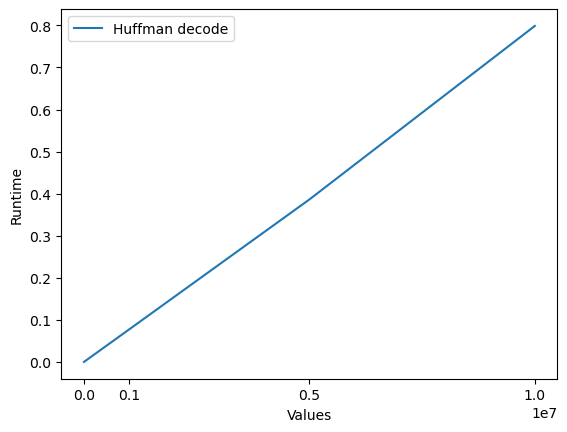

In [24]:
test_multiple([g.encode], [1000000, 5000000, 10000000], 10, SYMBOLS, ["Huffman decode"])

# Алгоритм LZW

# Алгоритм LZ77


In [4]:
class Lz77:
    """
    Lz77 coding alghorithm
    """
    def __init__(self, buffer):
        self.buffer_size=buffer
    def encode(self, data):
        """
        Encode a string using lz77
        """
        codings=[]
        buffer=""
        while len(data)!=0:
            match,ind=self.find_best_match(data,buffer)
            if match:
                data=data[len(match):]
                codings.append((ind,len(match),data[0] if data else ""))
                buffer+=match+data[0] if data else match
                buffer=buffer[-self.buffer_size:]
                data=data[1:]
            else:
                codings.append((0,0,data[0]))
                buffer+=data[0]
                buffer=buffer[-self.buffer_size:]
                data=data[1:]
        return codings
    def find_best_match(self, data, buffer):
        """
        Finds longest match between data and buffer
        """
        if not data or not buffer:
            return "",None
        _match=""
        max_ind=0
        if buffer==data[:len(buffer)]:
            for i,el in enumerate(data):
                if el==buffer[i%len(buffer)]:
                    _match+=el
                else:
                    break
            return _match, len(buffer)
        for i,el in enumerate(buffer):
            curr_match=""
            if el==data[0]:
                curr_match=el
                ind=0
                for j in range(i+1,len(buffer)):
                    ind+=1
                    if ind+1<=len(data) and data[ind]==buffer[j]:
                        curr_match+=data[ind]
                    else:
                        break
                if len(curr_match)>len(_match):
                    _match=curr_match
                    max_ind=i
        return _match, len(buffer)-max_ind

    def decode(self, data):
        """
        Decode a string using lz77
        """
        msg=""
        for el in data:
            if el[0]==0:
                msg+=el[2]
            else:
                if el[1]>el[0]:
                    div=el[1]//el[0]
                    mod=el[1]%el[0]
                    msg+=msg[-el[0]:]*div+msg[-el[0]:-el[0]+mod]
                    el=el[0],el[1]%el[0],el[2]
                msg+=msg[-el[0]:len(msg)-el[0]+el[1]]+el[2]
        return msg
    @staticmethod
    def calculate_compression(encoded, original):
        """
        Calculate compression ratio
        (4 bits for distance, 4 bits for length, 8 bits for char)*len / (8 bits for char)*len
        """
        encoded_len=0
        for o,d,c in encoded:
            encoded_len+=len(bin(o))-2+len(bin(d))-2+8
        return len(original)*8/encoded_len*100

Алгоритм LZ77 працює наступним чином:
1) У нього є якесь вікно (текст, який треба закодувати, іноді його обмежують по довжині, але в нашому випадку) він не обмежується.  
2) У нього є буфер, який є обмеженим.
3) Ми перебігаєм по елементам вікна. Якщо цей елемент є у буфері, ми з нього починаємо шукати інші символи, які метчаться. Робимо так, поки не переберем всі елементи.
4) Зрештою, записуємо найдовший метч у буфер та кодуємо його триплетом (Offset, Distance, Char), де Offset - відстань символа в буфері, Distance - довжина метчу, char - символ, який закодували.

<br>Так продовжуємо, допоки не переберемо всі символи.

### Тестування LZ77

In [38]:
lz=Lz77(10000)
msh=lz.encode("aababcabcabcabcabcabc")
print(lz.decode(msh)=="aababcabcabcabcabcabc")
print(lz.decode(lz.encode("icanttakeitanymoreee")))
lorem_ipsum="""
Lorem ipsum dolor sit amet, consectetur adipiscing elit,
 sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim
 ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip
 ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate
 velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat
 cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
"""
print(lz.decode(lz.encode(lorem_ipsum))==lorem_ipsum)
print(lz.calculate_compression(lz.encode(lorem_ipsum),lorem_ipsum))
lz_encoded=lz.encode(eneida)
print(lz.decode(lz_encoded)==eneida)
print(lz.calculate_compression(lz_encoded,eneida))

True
icanttakeitanymoreee
True
135.73573573573574
True
161.0730870405953


100%|██████████| 3/3 [00:09<00:00,  3.20s/it]

[0, 7.51495361328125e-05, 0.0009114742279052734, 0.009275388717651368]
[0, 100, 1000, 10000]


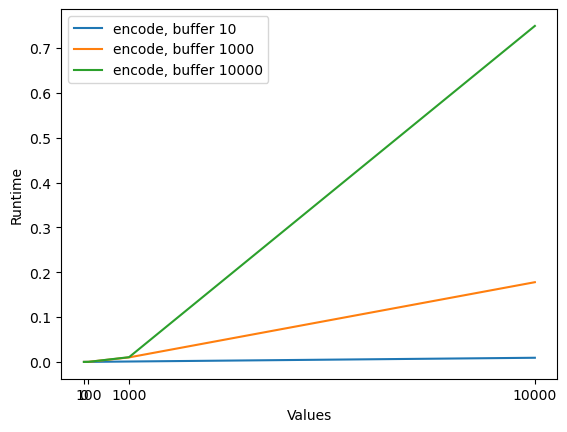

In [26]:
test_multiple([Lz77(10).encode,Lz77(1000).encode,Lz77(10000).encode],[100,1000,10000],\
              10,SYMBOLS,["encode, buffer 10", "encode, buffer 1000", "encode, buffer 10000"])

# Алгоритм Deflate

Цей алгоритм поєднує в собі два інші алгоритми кодування, задля кращого стиснення.  
Спочатку, ми кодуємо повідомлення за Гаффмана та переводимо його у послідовності 0 та 1. Після цього, закодовуємо це повідомлення у триплети.

In [57]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer_size=buffer_size
        self.lz=Lz77(buffer_size)
        self.huffman=Huffman()

    def encode(self, text: str) -> str:
        msg,dictionary=self.huffman.encode(text)
        msg=self.lz.encode(msg)
        return msg, dictionary

    def decode(self, code: str, dictionary: dict) -> str:
        msg=self.lz.decode(code)
        return self.huffman.decode(msg,dictionary)
    
    def calculate_compression(self, code: str, original: str) -> float:
        return self.lz.calculate_compression(code, original)
    

In [59]:
d=Deflate(10000)
defflate_encoded=d.encode(eneida)
print(d.calculate_compression(defflate_encoded[0],eneida))

109.7065678914342
